In [1]:
import numpy as np # For data management
import pandas as pd # For data management

import seaborn as sns # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt # For data visualization

from sklearn import datasets # To import the sample dataset
from sklearn.preprocessing import StandardScaler # To transform the dataset
from sklearn.cluster import DBSCAN # To instantiate and fit the model
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [129]:
import pandas as pd
df=pd.read_csv('gdrive/MyDrive/Data/data_prepared.csv') #Temperature df

df_gdp=pd.read_csv('gdrive/MyDrive/Data/gdp-per-capita-worldbank.csv') #Temperature df

In [130]:
df=df.drop(columns=['Unnamed: 0'])
df

,Country,Year,CO2,Population(2022),AverageTemperature
0,Afghanistan,1959,1839179,41128771.0,14.15
1,Afghanistan,1960,2253064,41128771.0,13.99
2,Afghanistan,1961,2743862,41128771.0,14.06
3,Afghanistan,1962,3432456,41128771.0,13.77
4,Afghanistan,1963,4139192,41128771.0,15.03
...,...,...,...,...,...
10225,Zimbabwe,2009,664256525,16320537.0,21.38
10226,Zimbabwe,2010,672134841,16320537.0,21.99
10227,Zimbabwe,2011,681878824,16320537.0,21.60
10228,Zimbabwe,2012,689761713,16320537.0,21.52


In [131]:
df_gdp=pd.read_csv('gdrive/MyDrive/Data/gdp-per-capita-worldbank.csv') #Temperature df
df_gdp.rename(columns = {'GDP per capita, PPP (constant 2017 international $)':'GDP', 'Entity':'Country'}, inplace = True)

df_gdp


,Country,Code,Year,GDP
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810059
2,Afghanistan,AFG,2004,1200.277954
3,Afghanistan,AFG,2005,1286.793701
4,Afghanistan,AFG,2006,1315.789062
...,...,...,...,...
6161,Zimbabwe,ZWE,2016,3678.217041
6162,Zimbabwe,ZWE,2017,3795.642334
6163,Zimbabwe,ZWE,2018,3923.030518
6164,Zimbabwe,ZWE,2019,3630.033936


In [186]:

df_gdp_new=pd.merge(df,df_gdp,on=['Country','Year'],how="inner",indicator=True)
#df_final=df_final[df_final['_merge']=='left_only']
# resetting the DataFrame index
df_gdp_new = df_gdp_new.reset_index()

df_gdp_new=df_gdp_new.drop(columns=['Code','_merge','index'])
df_gdp_new['co2/capita'] = df_gdp_new['CO2']/df_gdp_new['Population(2022)']

df_gdp_new['GDP'] = df_gdp_new['GDP']/100
df_gdp_new

gdp = df_gdp_new[df_gdp_new['Year']==2000]
gdp

,Country,Year,CO2,Population(2022),AverageTemperature,GDP,co2/capita
22,Albania,2000,196683520,2842321.0,13.75,58.925903,69.198208
46,Algeria,2000,2113382298,44903225.0,24.03,87.104443,47.065268
70,Angola,2000,190139578,35588987.0,22.36,47.279663,5.342652
94,Argentina,2000,4979454768,45510318.0,14.75,186.252832,109.413755
118,Armenia,2000,286200967,2780469.0,9.92,40.482500,102.932623
...,...,...,...,...,...,...,...
3659,Uruguay,2000,242006768,3422794.0,17.76,144.827549,70.704450
3683,Uzbekistan,2000,4021038044,34627652.0,13.94,29.676018,116.122169
3707,Vietnam,2000,1084930377,98186856.0,23.98,29.549829,11.049650
3731,Zambia,2000,169542743,20017675.0,21.56,19.908590,8.469652


In [187]:
#gdp = df_gdp_new.copy()

gdp=gdp.drop(columns=['Country'])

#gdp=gdp.drop(columns=['Unnamed: 0'])

gdp=gdp.drop(columns=['AverageTemperature'])

gdp=gdp.drop(columns=['Year'])

gdp=gdp.drop(columns=['CO2'])

gdp = gdp.rename(columns={"co2/capita": "CO2"})
#gdp = gdp.reindex(columns=['AverageTemperature','CO2','GDP'])
gdp = gdp.reindex(columns=['CO2','GDP'])
print(gdp)
df_2010=gdp

             CO2         GDP
22     69.198208   58.925903
46     47.065268   87.104443
70      5.342652   47.279663
94    109.413755  186.252832
118   102.932623   40.482500
...          ...         ...
3659   70.704450  144.827549
3683  116.122169   29.676018
3707   11.049650   29.549829
3731    8.469652   19.908590
3755   35.275696   43.533682

[161 rows x 2 columns]


In [188]:

df_2010= df_2010.fillna(method='ffill')
df_2010

,CO2,GDP
22,69.198208,58.925903
46,47.065268,87.104443
70,5.342652,47.279663
94,109.413755,186.252832
118,102.932623,40.482500
...,...,...
3659,70.704450,144.827549
3683,116.122169,29.676018
3707,11.049650,29.549829
3731,8.469652,19.908590


In [ ]:
# !!!! NON RUNNARE !!!!!
df_2010 = df
df_2010 = df[df['Year']==1990]

df_2010 = df_2010.reset_index()

df_2010=df_2010.drop(columns=['index','Year','Country','AverageTemperature'])
df_2010

In [240]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df_2010)

scaled_dataframe = pd.DataFrame( scaled_array, columns = df_2010.columns )
print(df_2010)
print(abs(scaled_dataframe))

             CO2         GDP
22     69.198208   58.925903
46     47.065268   87.104443
70      5.342652   47.279663
94    109.413755  186.252832
118   102.932623   40.482500
...          ...         ...
3659   70.704450  144.827549
3683  116.122169   29.676018
3707   11.049650   29.549829
3731    8.469652   19.908590
3755   35.275696   43.533682

[161 rows x 2 columns]
          CO2       GDP
0    0.068167  0.051656
1    0.046344  0.079319
2    0.005205  0.040223
3    0.107820  0.176653
4    0.101429  0.033550
..        ...       ...
156  0.069652  0.135986
157  0.114435  0.022941
158  0.010832  0.022817
159  0.008288  0.013353
160  0.034719  0.036545

[161 rows x 2 columns]


# DBSCAN

In [251]:

df_DBSCAN = df_2010.copy()

dbscan_model = DBSCAN( eps = 0.25, min_samples = 8)
dbscan_model.fit(scaled_dataframe)
labels_DBSCAN = dbscan_model.labels_


df_DBSCAN["LABEL_DBSCAN"] = labels_DBSCAN
df_DBSCAN.head(15)
print(labels_DBSCAN)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0]


# KMEANS

In [259]:
from sklearn.cluster import KMeans
kmeans = KMeans(
  init="random",
  n_clusters=6,
  n_init=30,
  max_iter=3000,
  random_state=42
)

kmeans.fit(df_2010)
df_KMEANS = df_2010.copy()
labels_KMEANS = kmeans.labels_
df_KMEANS["LABEL_KMEANS"] = labels_KMEANS
df_KMEANS.head(15)

,CO2,GDP,LABEL_KMEANS
22,69.198208,58.925903,4
46,47.065268,87.104443,4
70,5.342652,47.279663,4
94,109.413755,186.252832,0
118,102.932623,40.482500,4
142,102.932623,414.996367,0
166,408.330406,382.174492,1
190,458.429426,464.698594,1
214,175.375295,39.985205,4
238,308.727836,405.659297,1


In [265]:
df_2010.corr()

,CO2,GDP
CO2,1.000000,0.562107
GDP,0.562107,1.000000


# CLARANS

In [192]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [252]:
from pyclustering.cluster.clarans import clarans;
from pyclustering.utils import timedcall;
from sklearn import datasets

"""!
The pyclustering library clarans implementation requires
list of lists as its input dataset.
Thus we convert the data from numpy array to list.
"""
data = df_2010.values.tolist()

"""!
@brief Constructor of clustering algorithm CLARANS.
@details The higher the value of maxneighbor, the closer is CLARANS to K-Medoids, and the longer is each search of a local minima.

@param[in] data: Input data that is presented as list of points (objects), each point should be represented by list or tuple.
@param[in] number_clusters: amount of clusters that should be allocated.
@param[in] numlocal: the number of local minima obtained (amount of iterations for solving the problem).
@param[in] maxneighbor: the maximum number of neighbors examined.        
"""
clarans_instance = clarans(data, 6, 6, 4);

#calls the clarans method 'process' to implement the algortihm
(ticks, result) = timedcall(clarans_instance.process);
print("Execution time : ", ticks, "\n");

#returns the clusters 
clusters = clarans_instance.get_clusters();

#returns the mediods 
medoids = clarans_instance.get_medoids();


print("Index of the points that are in a cluster : ",clusters)
#print("The target class of each datapoint : ",df.target)
print("The index of medoids that algorithm found to be best : ",medoids)


Execution time :  1.871694481999839 

Index of the points that are in a cluster :  [[14, 45, 53, 87, 154, 155], [0, 3, 4, 8, 12, 30, 36, 52, 59, 67, 70, 72, 79, 85, 92, 95, 97, 98, 128, 135, 136, 140, 150, 157], [5, 10, 69, 78, 108, 120, 131, 142, 153], [6, 7, 9, 26, 37, 38, 48, 49, 55, 62, 64, 71, 73, 103, 104, 109, 118, 126, 133, 137, 141], [13, 21, 63, 75, 81, 86, 96, 111, 117, 121, 122, 132, 152], [1, 2, 11, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 31, 32, 33, 34, 35, 39, 40, 41, 42, 43, 44, 46, 47, 50, 51, 54, 56, 57, 58, 60, 61, 65, 66, 68, 74, 76, 77, 80, 82, 83, 84, 88, 89, 90, 91, 93, 94, 99, 100, 101, 102, 105, 106, 107, 110, 112, 113, 114, 115, 116, 119, 123, 124, 125, 127, 129, 130, 134, 138, 139, 143, 144, 145, 146, 147, 148, 149, 151, 156, 158, 159, 160]]
The index of medoids that algorithm found to be best :  [14, 4, 108, 48, 86, 147]


In [253]:
df_CLARANS = df_2010.copy()
lenght=len(df_2010)
#df_CLARANS["LABEL_CLARANS"] = np.nan
labels_CLARANS=[None] * lenght

for i in range(6):
  for j in range(len(clusters[i])):
    labels_CLARANS[clusters[i][j]]=i

df_CLARANS["LABEL_CLARANS"] = labels_CLARANS
df_CLARANS.head(15)
# df_CLARANS["LABEL_CLARANS"].loc[clusters[j]] = i


,CO2,GDP,LABEL_CLARANS
22,69.198208,58.925903,1
46,47.065268,87.104443,5
70,5.342652,47.279663,5
94,109.413755,186.252832,1
118,102.932623,40.482500,1
142,102.932623,414.996367,2
166,408.330406,382.174492,3
190,458.429426,464.698594,3
214,175.375295,39.985205,1
238,308.727836,405.659297,3


# WARD

In [195]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the Mall_Customers dataset by pandas
#X = scaled_dataframe.values
X = df_2010.values

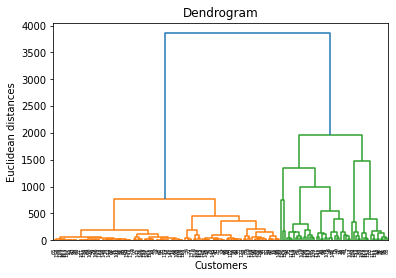

In [196]:
#3 Using the dendrogram to find the optimal numbers of clusters. 
# First thing we're going to do is to import scipy library. scipy is #an open source Python library that contains tools to do #hierarchical clustering and building dendrograms. Only import the #needed tool.
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [263]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')

y_hc=hc.fit_predict(X)


df_WARD = df_2010.copy()
df_WARD["LABEL_WARD"] = y_hc
df_WARD.head(15)



,CO2,GDP,LABEL_WARD
22,69.198208,58.925903,0
46,47.065268,87.104443,0
70,5.342652,47.279663,0
94,109.413755,186.252832,0
118,102.932623,40.482500,0
142,102.932623,414.996367,5
166,408.330406,382.174492,4
190,458.429426,464.698594,4
214,175.375295,39.985205,0
238,308.727836,405.659297,4


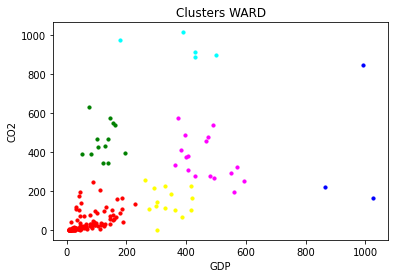

In [264]:
plt.scatter(X[y_hc==0, 1], X[y_hc==0, 0], s=10, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 1], X[y_hc==1, 0], s=10, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 1], X[y_hc==2, 0], s=10, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 1], X[y_hc==3, 0], s=10, c='cyan', label ='Cluster 4')
plt.scatter(X[y_hc==4, 1], X[y_hc==4, 0], s=10, c='magenta', label ='Cluster 5')
plt.scatter(X[y_hc==5, 1], X[y_hc==5, 0], s=10, c='yellow', label ='Cluster 6')

plt.title('Clusters WARD')
plt.xlabel('GDP')
plt.ylabel('CO2')
plt.show()

# PLOT

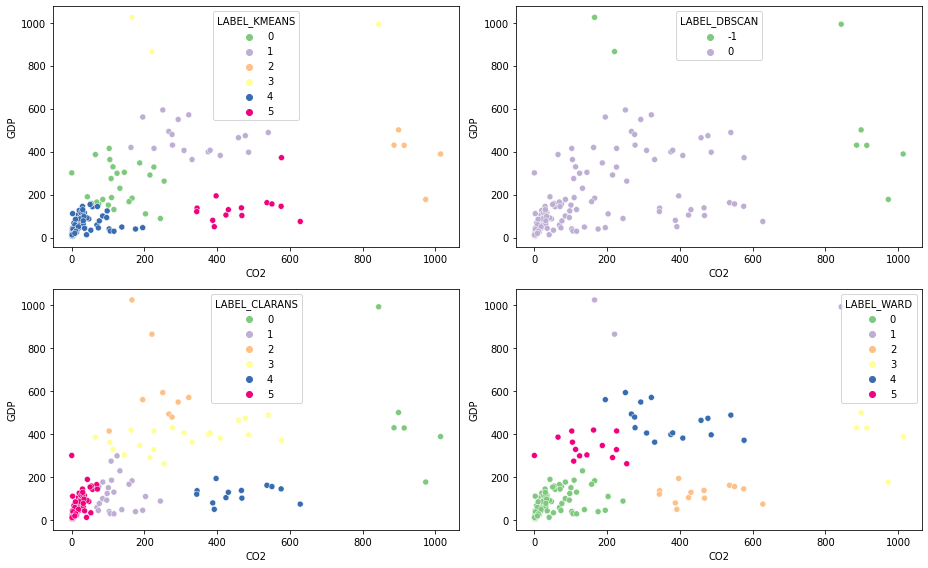

In [260]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "CO2", y = "GDP", data = df_KMEANS, hue = "LABEL_KMEANS", palette = "Accent", ax = ax1)

sns.scatterplot(x = "CO2", y = "GDP", data = df_DBSCAN, hue = "LABEL_DBSCAN", palette = "Accent", ax = ax2)

sns.scatterplot(x = "CO2", y = "GDP", data = df_CLARANS, hue = "LABEL_CLARANS", palette = "Accent", ax = ax3)

sns.scatterplot(x = "CO2", y = "GDP", data = df_WARD, hue = "LABEL_WARD", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

# DBSCAN 3D

In [4]:
df_2011 = df
df_2011 = df[df['Country']=='Afghanistan']

df_2011 = df_2011[df_2011['Year']>1960]

df_2011 = df_2011.reset_index()
df_2011=df_2011.drop(columns=['index'])

print(df_2011)

df_2011=df_2011.drop(columns=['Country'])

#####


    Unnamed: 0      Country  Year        CO2  AverageTemperature
0            2  Afghanistan  1961    2743862               14.06
1            3  Afghanistan  1962    3432456               13.77
2            4  Afghanistan  1963    4139192               15.03
3            5  Afghanistan  1964    4977743               13.08
4            6  Afghanistan  1965    5984660               14.10
5            7  Afghanistan  1966    7075819               14.34
6            8  Afghanistan  1967    8357684               13.66
7            9  Afghanistan  1968    9581075               13.76
8           10  Afghanistan  1969   10522307               13.81
9           11  Afghanistan  1970   12192704               14.78
10          12  Afghanistan  1971   14086258               14.82
11          13  Afghanistan  1972   15616605               12.55
12          14  Afghanistan  1973   17252059               14.24
13          15  Afghanistan  1974   19165211               13.32
14          16  Afghanist

In [5]:
df_gdp=pd.read_csv('gdrive/MyDrive/Data/gdp-per-capita-worldbank.csv') #Temperature df
df_gdp.rename(columns = {'GDP per capita, PPP (constant 2017 international $)':'GDP', 'Entity':'Country'}, inplace = True)

df_gdp


,Country,Code,Year,GDP
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810059
2,Afghanistan,AFG,2004,1200.277954
3,Afghanistan,AFG,2005,1286.793701
4,Afghanistan,AFG,2006,1315.789062
...,...,...,...,...
6161,Zimbabwe,ZWE,2016,3678.217041
6162,Zimbabwe,ZWE,2017,3795.642334
6163,Zimbabwe,ZWE,2018,3923.030518
6164,Zimbabwe,ZWE,2019,3630.033936


In [6]:

df_gdp_new=pd.merge(df,df_gdp,on=['Country','Year'],how="inner",indicator=True)
#df_final=df_final[df_final['_merge']=='left_only']
# resetting the DataFrame index
df_gdp_new = df_gdp_new.reset_index()

df_gdp_new=df_gdp_new.drop(columns=['Code','_merge','index'])
df_gdp_new

,Unnamed: 0,Country,Year,CO2,AverageTemperature,GDP
0,43,Afghanistan,2002,73529311,15.54,1189.784668
1,44,Afghanistan,2003,74715262,14.92,1235.810059
2,45,Afghanistan,2004,75604429,15.77,1200.277954
3,46,Afghanistan,2005,76907696,14.98,1286.793701
4,47,Afghanistan,2006,78543074,15.60,1315.789062
...,...,...,...,...,...,...
3764,10225,Zimbabwe,2009,664256525,21.38,2413.126709
3765,10226,Zimbabwe,2010,672134841,21.99,2849.079346
3766,10227,Zimbabwe,2011,681878824,21.60,3203.870605
3767,10228,Zimbabwe,2012,689761713,21.52,3674.874268


In [7]:
#gdp = gdp[gdp['Year']==2005]

gdp = df_gdp_new.copy()
gdp = gdp[gdp['Country']=='Lithuania']


#gdp2 = df_gdp_new.copy()
#gdp2 = gdp2[gdp2['Country']=='Poland']



#frames = [gdp1, gdp2]

#gdp = pd.concat(frames)
gdp
#print(gdp.loc[df['Country'].isin(['Germany'])])


,Unnamed: 0,Country,Year,CO2,AverageTemperature,GDP
2017,5481,Lithuania,1995,1210855079,7.01,10640.360352
2018,5482,Lithuania,1996,1226628523,5.41,11274.639648
2019,5483,Lithuania,1997,1241824872,6.73,12302.101562
2020,5484,Lithuania,1998,1257855450,6.65,13317.908203
2021,5485,Lithuania,1999,1271338425,7.68,13259.617188
2022,5486,Lithuania,2000,1283214825,8.11,13846.683594
2023,5487,Lithuania,2001,1295841898,7.12,14872.378906
2024,5488,Lithuania,2002,1308541057,7.71,16004.438477
2025,5489,Lithuania,2003,1321233656,6.83,17839.783203
2026,5490,Lithuania,2004,1334520961,6.84,19226.468750


In [9]:

gdp=gdp.drop(columns=['Country'])

gdp=gdp.drop(columns=['Unnamed: 0'])
gdp=gdp.drop(columns=['Year'])
gdp = gdp.reindex(columns=['AverageTemperature','CO2','GDP'])
gdp

,AverageTemperature,CO2,GDP
2017,7.01,1210855079,10640.360352
2018,5.41,1226628523,11274.639648
2019,6.73,1241824872,12302.101562
2020,6.65,1257855450,13317.908203
2021,7.68,1271338425,13259.617188
2022,8.11,1283214825,13846.683594
2023,7.12,1295841898,14872.378906
2024,7.71,1308541057,16004.438477
2025,6.83,1321233656,17839.783203
2026,6.84,1334520961,19226.468750


In [10]:
#!pip install plotly
x = gdp.values
x

array([[7.01000000e+00, 1.21085508e+09, 1.06403604e+04],
       [5.41000000e+00, 1.22662852e+09, 1.12746396e+04],
       [6.73000000e+00, 1.24182487e+09, 1.23021016e+04],
       [6.65000000e+00, 1.25785545e+09, 1.33179082e+04],
       [7.68000000e+00, 1.27133842e+09, 1.32596172e+04],
       [8.11000000e+00, 1.28321482e+09, 1.38466836e+04],
       [7.12000000e+00, 1.29584190e+09, 1.48723789e+04],
       [7.71000000e+00, 1.30854106e+09, 1.60044385e+04],
       [6.83000000e+00, 1.32123366e+09, 1.78397832e+04],
       [6.84000000e+00, 1.33452096e+09, 1.92264688e+04],
       [6.92000000e+00, 1.34863837e+09, 2.10531855e+04],
       [7.42000000e+00, 1.36307245e+09, 2.29779961e+04],
       [7.85000000e+00, 1.37889650e+09, 2.58353672e+04],
       [8.18000000e+00, 1.39409901e+09, 2.67848809e+04],
       [7.10000000e+00, 1.40714130e+09, 2.30650625e+04],
       [6.33000000e+00, 1.42108639e+09, 2.39427598e+04],
       [7.64000000e+00, 1.43537920e+09, 2.59685840e+04],
       [6.72000000e+00, 1.44972

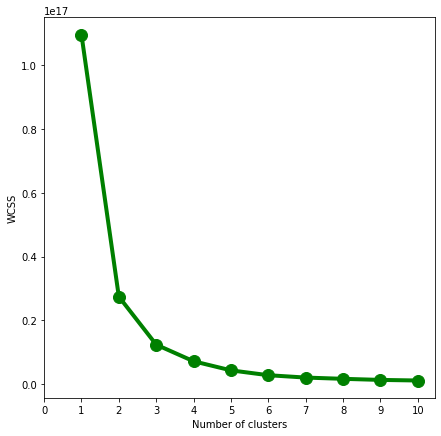

In [11]:
# find the optimal number of clusters using elbow method
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [13]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

5.41
1226628523.0
11274.6396484375


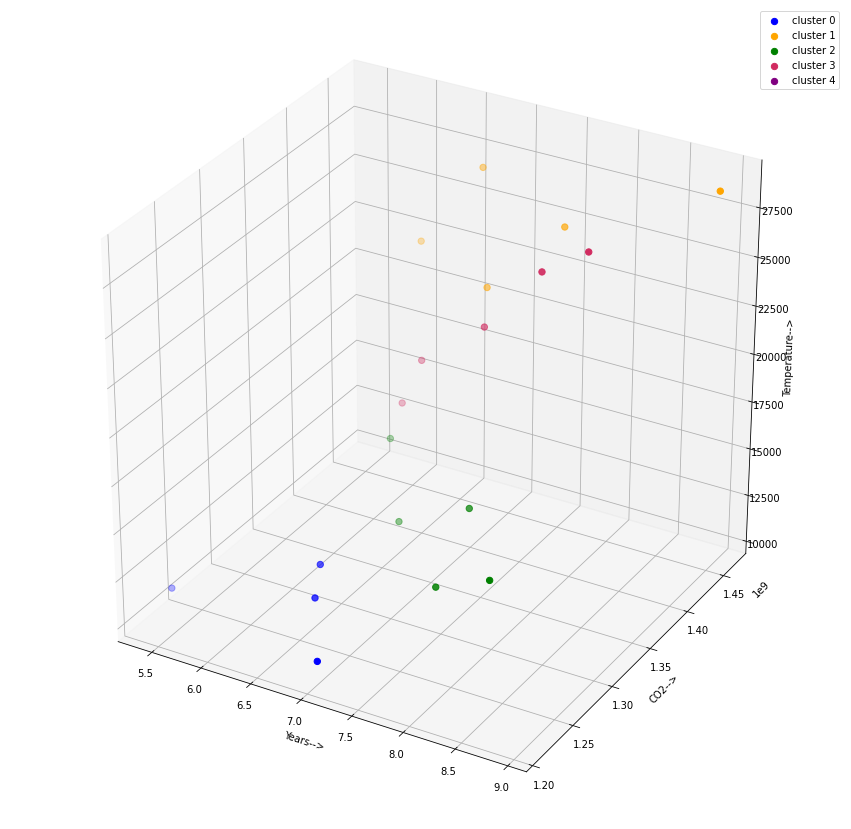

In [14]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Years-->')
ax.set_ylabel('CO2-->')
ax.set_zlabel('Temperature-->')
ax.legend()
plt.show()

In [15]:
import plotly.graph_objs as go
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'GDP'),yaxis = dict(title  = 'Co2'),zaxis = dict(title  = 'Temp'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 2], y=x[:, 1], z=x[:, 0], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)

fig.show()



,Country,Year,CO2,AverageTemperature,GDP
0,Afghanistan,2002,73529311,15.54,1189.784668
1,Afghanistan,2003,74715262,14.92,1235.810059
2,Afghanistan,2004,75604429,15.77,1200.277954
3,Afghanistan,2005,76907696,14.98,1286.793701
4,Afghanistan,2006,78543074,15.60,1315.789062
...,...,...,...,...,...
3764,Zimbabwe,2009,664256525,21.38,2413.126709
3765,Zimbabwe,2010,672134841,21.99,2849.079346
3766,Zimbabwe,2011,681878824,21.60,3203.870605
3767,Zimbabwe,2012,689761713,21.52,3674.874268
